In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
pd.options.display.max_rows = 30
np.set_printoptions(precision = 4, suppress = True)
pd.set_option('display.max_columns', None)  

### Import and Clean WHO data

In [2]:
#WHO - Global Health Observatory data repository - Number of people (all ages) living with HIV by country
file1 = "Number of people (all ages) living with HIV.csv"
df_who = pd.read_csv(file1)


In [3]:
df_who

,Country,2018,2010,2005,2000
0,Afghanistan,7200 [4100–11 000],4200 [2500–6200],2900 [1700–5000],1600 [1000–3500]
1,Albania,No data,No data,No data,No data
2,Algeria,16 000 [15 000–17 000],7100 [6600–7600],3700 [3500–4000],1900 [1700–2000]
3,Angola,330 000 [290 000–390 000],220 000 [180 000–250 000],150 000 [120 000–170 000],87 000 [72 000–110 000]
4,Argentina,140 000 [130 000–150 000],110 000 [96 000–120 000],85 000 [76 000–94 000],64 000 [55 000–71 000]
...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),120 000 [100 000–130 000],No data,No data,No data
166,Viet Nam,230 000 [200 000–260 000],220 000 [180 000–250 000],180 000 [160 000–210 000],120 000 [110 000–130 000]
167,Yemen,11 000 [6500–18 000],5100 [3500–7400],2400 [1500–4000],1100 [680–2500]
168,Zambia,1 200 000 [1 100 000–1 400 000],1 000 000 [900 000–1 100 000],920 000 [820 000–1 000 000],890 000 [800 000–1 000 000]


In [4]:
def simplify_cells(df):
    for i in df.iterrows():
        lines = i[1]
        for x in range(1,len(df.columns)):
            line = lines[x].split("[")
            i[1][x] = line[0]
    
simplify_cells(df_who)

In [5]:
#For 2018
df_who_2018 = pd.DataFrame(data=df_who,columns=["Country",2018])
df_who.columns = ["Country","Number of people (all ages) living with HIV in 2018",
                  "Number of people (all ages) living with HIV in 2010",
                  "Number of people (all ages) living with HIV in 2005",
                  "Number of people (all ages) living with HIV in 2000"]
df_who_2018.columns = ["Country","Number of people (all ages) living with HIV in 2018"]
df_who_2018["Number of people (all ages) living with HIV in 2018"]= df_who["Number of people (all ages) living with HIV in 2018"]

In [6]:
#For 2010 & 2000
df_who_2010 = pd.DataFrame(data=df_who,columns=["Country","Number of people (all ages) living with HIV in 2010"])
df_who_2010["Number of people (all ages) living with HIV in 2010"]= df_who["Number of people (all ages) living with HIV in 2010"]
df_who_2000 = pd.DataFrame(data=df_who,columns=["Country","Number of people (all ages) living with HIV in 2000"])
df_who_2000["Number of people (all ages) living with HIV in 2000"]= df_who["Number of people (all ages) living with HIV in 2000"]
df_who_2018 = df_who_2018.merge(df_who_2010, on="Country")
df_who_2018 = df_who_2018.merge(df_who_2000, on="Country")

In [7]:
df_who_new = pd.read_csv("Number of new HIV infections.csv")

In [8]:
simplify_cells(df_who_new)

df_who_new.columns = ["Country","Number of new HIV infections in 2018", "HIV incidence rate (per 1000 uninfected population) in 2018"]
df_who_2018 = df_who_2018.merge(df_who_new, left_on="Country", right_on="Country")

In [9]:
#Importing Antiretroviral therapy coverage.csv
df_who_new = pd.read_csv("Antiretroviral therapy coverage.csv")
simplify_cells(df_who_new)
df_who_new.columns =["Country", "Estimated antiretroviral therapy coverage among people living with HIV (%) in 2018",
                    "Reported number of people receiving antiretroviral therapy in 2018", "Number of people with HIV in 2018",
                    "Number of people with HIV in 2010", "Number of people with HIV in 2005","Number of people with HIV in 2000"]
df_who_new_2018 = pd.DataFrame(data=df_who_new,columns=["Country","Estimated antiretroviral therapy coverage among people living with HIV (%) in 2018",
                                                       "Reported number of people receiving antiretroviral therapy in 2018"])
df_who_2018 = df_who_2018.merge(df_who_new_2018, on = "Country")

In [10]:
#Importing Number of deaths due to HIV AIDS.csv
df_who_new = pd.read_csv("Number of deaths due to HIV AIDS.csv")

In [11]:
simplify_cells(df_who_new)
for i in df_who_new.iterrows():
    for x in range(1,len(df_who_new.columns)):
        line = i[1][x].split(";")
        if len(line)>1:
            i[1][x] = line[1]
df_who_new.columns = ["Country", "Number of deaths due to HIV AIDS in 2018", "Number of deaths due to HIV AIDS in 2010",
                      "Number of deaths due to HIV AIDS in 2000"]
df_who_new_2018 = pd.DataFrame(data=df_who_new, columns=["Country","Number of deaths due to HIV AIDS in 2018"])
df_who_2018 = df_who_2018.merge(df_who_new_2018, left_on="Country", right_on="Country")

In [12]:
#For 2010 and 2000
df_who_2018["Number of deaths due to HIV AIDS in 2010"] = df_who_new["Number of deaths due to HIV AIDS in 2010"]
df_who_2018["Number of deaths due to HIV AIDS in 2000"] = df_who_new["Number of deaths due to HIV AIDS in 2000"]

In [13]:
#Importing Pediatric antiretroviral therapy coverage.csv
df_who_new = pd.read_csv("Pediatric antiretroviral therapy coverage.csv")

df_who_new.columns = ["Country", "Estimated antiretroviral therapy coverage among children in 2018",
                     "Estimated number of children needing antiretroviral therapy based on WHO methods in 2018",
                     "Reported number of people receiving antiretroviral therapy in 2018"]
df_who_2018["Reported number of people receiving antiretroviral therapy in 2018"] = df_who_new["Reported number of people receiving antiretroviral therapy in 2018"]
df_who_new = df_who_new.drop(["Reported number of people receiving antiretroviral therapy in 2018"], axis=1)

In [14]:
for i in df_who_new.iterrows():
        line= str(i[1][1]).split("[")[0]
        i[1][1] = line
        
for i in df_who_new.iterrows():
        line= str(i[1][1]).split(";")[-1]
        i[1][1] = line
        
for i in df_who_new.iterrows():
    line= str(i[1][2]).split("[")[0]
    i[1][2] = line
    
for i in df_who_new.iterrows():
        line= str(i[1][2]).split(";")[-1]
        i[1][2] = line

In [15]:
df_who_2018 = df_who_2018.merge(df_who_new, left_on="Country", right_on="Country")
df_who = df_who_2018
df_who = df_who.replace(["No data","nan"], np.nan)

In [16]:
#https://data.worldbank.org/indicator/NY.GDP.MKTP.CD
#Wanted to add income group and region from this dataset
df_incomegroup = pd.read_csv("Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_672988.csv")
df_incomegroup = df_incomegroup.drop(["Country Code","SpecialNotes","Unnamed: 5"],axis=1)
df_incomegroup.columns = ["Region","Income Group","Country"]

In [17]:
df_incomegroup = df_incomegroup.replace(["Bahamas, The", "Congo, Dem. Rep.", "Korea, Rep.", "Czech Republic","Egypt, Arab Rep."
                       ,"Iran, Islamic Rep.","Lao PDR","Gambia, The","Venezuela, RB","Yemen, Rep.","United States"],
                       ["Bahamas", "Democratic Republic of the Congo",
                        "Democratic People's Republic of Korea", "Czechia","Egypt","Iran (Islamic Republic of)",
                        "Lao People's Democratic Republic","Gambia","Venezuela (Bolivarian Republic of)","Yemen","United States of America"])
df_who =df_who.replace(["Bolivia (Plurinational State of)","Republic of Moldova", "Viet Nam", "United Republic of Tanzania","Republic of North Macedonia"],
               ["Bolivia", "Moldova", "Vietnam", "Tanzania","North Macedonia"])

In [18]:
df_who = df_who.merge(df_incomegroup,left_on="Country",right_on="Country")

In [19]:
#Import and clean gdp data
df_gdp = pd.read_csv("country_gdp_code.csv")
df_gdp = df_gdp.replace(["Bahamas, The","Brunei","Cote d'Ivoire","Czech Republic","Gambia, The","Iran","Laos","United States"],
                        ["Bahamas","Brunei Darussalam","Côte d'Ivoire","Czechia","Gambia","Iran (Islamic Republic of)","Lao People's Democratic Republic","United States of America"])
df_who = df_who.merge(df_gdp,left_on="Country",right_on="COUNTRY")
df_who = df_who.drop(["COUNTRY"],axis=1)


In [20]:
for col in df_who.columns[1:13]:
    stripped = df_who[col].str.replace(" ","")
    stripped = stripped.replace({"<500":"500","<100":"100","<200":"200","&lt;100": "100","&lt;200": "200",
                                "&lt;500": "500"})
    df_who[col] = stripped

#The values were strings
def turn_column_int(df, column_name):
    data_dict = {column_name:[]}
    for num in df[column_name]:    
        if type(num)==str and num.replace(" ","").strip().isalnum():
            num = int(num.replace(" ","").strip())
        data_dict[column_name].append(num)
    df_new = pd.DataFrame(data_dict)
    df[column_name] = df_new

cols = df_who.columns[1:13]
for col in cols:
    turn_column_int(df_who, col)

### Various factors that worsen the situation HIV in countries

https://www.theglobalfund.org/en/hivaids/ states that "Human rights and gender-related barriers to health have long blocked national responses to HIV, TB and malaria, including: stigma and discrimination; gender inequality and violence; punitive practices, policies and laws; and social and economic inequality." I wanted to see the relationship between violence against women and data on HIV. The data is from https://data.oecd.org/inequality/violence-against-women.htm#indicator-chart

In [21]:
#Read the file on violence against women
df_women = pd.read_csv("violence_against_women_oecd.csv")
df_women
#The data about the year 2019
df_women_2019 = df_women.loc[df_women.TIME==2019,["LOCATION","Value"]]
df_women_2019.columns = ["LOCATION","Violence Against Women 2019"]
#Merge with the main dataframe
df_who = pd.merge(df_who, df_women_2019, left_on='CODE', right_on="LOCATION", how='outer')
df_who = df_who.loc[0:156,:]
df_who = df_who.drop(columns=["LOCATION"],axis=1)

(0.0, 50000.0)

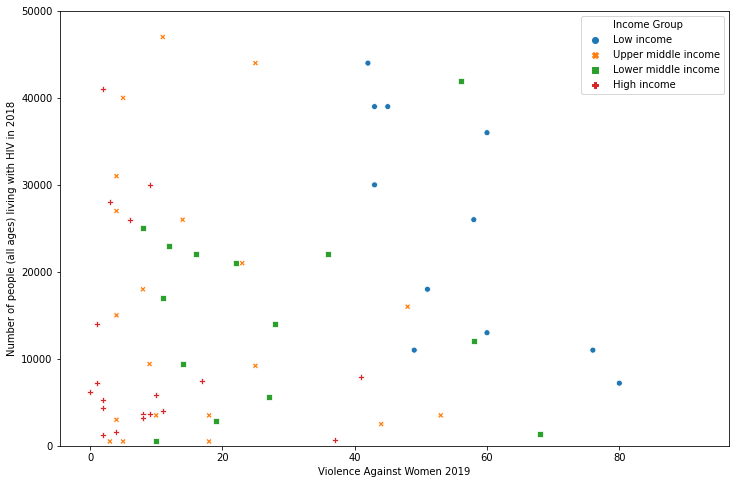

In [22]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.scatterplot(x="Violence Against Women 2019", y="Number of people (all ages) living with HIV in 2018",
                hue="Income Group", style="Income Group",data=df_who)
plt.ylim(0, 50000)

https://www.theglobalfund.org/en/hivaids/: "Key populations for HIV include gay, bisexual and other men who have sex with men, people who inject drugs, sex workers, and transgender people, and people in prison. People in these groups are are socially marginalized, often criminalized and face a range of human rights abuses that increase their vulnerability to HIV. Those living with HIV are also considered as a key population."

In [23]:
#People living with HIV who know their status https://aidsinfo.unaids.org
file3 = "Treatment cascade_People living with HIV who know their status (%)_Population_ All ages.csv"
df_new3 = pd.read_csv(file3)
cols = df_new3.columns[1:13:3]
df_new4 = pd.DataFrame(df_new3.Country)

df_new3 = pd.concat([df_new3[cols],df_new4],axis=1)
df_new3.columns = ["People living with HIV who know their status (%) 2015","People living with HIV who know their status (%) 2016",
                   "People living with HIV who know their status (%) 2017","People living with HIV who know their status (%) 2018","Country"]


In [24]:
#Men who have sex with men & HIV prevelance among men who have sex with men https://aidsinfo.unaids.org
file1 = "Men who have sex with men_Men who have sex with men_ Size estimate.csv"
file2 = "Men who have sex with men_HIV prevalence among men who have sex with men_Population_ All ages.csv"
df_new1 = pd.read_csv(file1)
df_new2 = pd.read_csv(file2)
df_new1.columns = ["Country","Men who have sex with men (2018)","Most recent data as of 2018_Footnote"]
df_new2.columns = ["Country","HIV prevalence among men who have sex with men (2018)","Most recent data as of 2018_Footnote"]
df_new1 = pd.merge(df_new1, df_new2, on="Country", suffixes=('_left', '_right'))
df_new1 = pd.merge(df_new1, df_new3, on="Country", suffixes=('_left', '_right'))
df_new1 = df_new1.replace(["United States","Republic of Moldova","Syrian Arab Republic","Democratic Republic of the Congo","The former Yugoslav Republic of Macedonia","United Republic of Tanzania",
                        "Venezuela (Bolivarian Republic of)","Viet Nam","Bolivia (Plurinational State of)"],
                        ["United States of America","Moldova","Syria","Congo, Republic of the","Macedonia","Tanzania"
                        ,"Venezuela","Vietnam","Bolivia"])
df_gdp = df_gdp.drop(["GDP (BILLIONS)"], axis=1)
df_new1 = pd.merge(df_new1, df_gdp, left_on="Country", right_on="COUNTRY", how="outer")

df_new1 = df_new1.drop(["Most recent data as of 2018_Footnote_left","Most recent data as of 2018_Footnote_right","COUNTRY","Country"],axis=1)
df_who = pd.merge(df_who, df_new1, on="CODE", how="outer")

turn_column_int(df_who, "Men who have sex with men (2018)")

for col in df_who.columns[-4:]:
    turn_column_int(df_who, col)

df_who = df_who[:-61]

#### Adding population numbers 

In [25]:
df_new = pd.read_csv("population-worldbank.csv")
df_new = df_new.iloc[:,[1,44,54,62]]
df_new.columns = ["CODE","Population 2000", "Population 2010", "Population 2018"]
df_who = pd.merge(df_new,df_who,on="CODE")

## Comparing years 

Our dataset has values of certain features for the years 2000, 2005, 2010. Thus, we wanted to use it to compare values from different years. Using the features "Number of people (all ages) living with HIV" and "Population", we created the feature "Percentage of People with HIV". The values for the countries in Sub-Saharan Africa were almost complete and we decided to focus on them. After grouping them by income, we observed that the values for upper middle income increased over the years. At the same time there are less countries in that income group than others so the mean value for upper middle income might have changed more easily.

When we listed the upper middle income countries, we saw that the percentage of people with HIV have risen in South Africa, Equiatorial Guinea, Mauritus, and Namibia over the years. Why?

In [26]:
df_years = pd.DataFrame(data=df_who, columns=["CODE","Income Group","Region"])

In [27]:
df_years["Percentage of People with HIV 2000"] = df_who["Number of people (all ages) living with HIV in 2000"]*100/df_who["Population 2000"]
df_years["Percentage of People with HIV 2010"] = df_who["Number of people (all ages) living with HIV in 2010"]*100/df_who["Population 2010"]
df_years["Percentage of People with HIV 2018"] = df_who["Number of people (all ages) living with HIV in 2018"]*100/df_who["Population 2018"]

In [28]:
#Extract countries in the region of Sub-Saharan Africa
df_afr = df_years.loc[df_years.Region=="Sub-Saharan Africa",:]
df_afr

,CODE,Income Group,Region,Percentage of People with HIV 2000,Percentage of People with HIV 2010,Percentage of People with HIV 2018
1,AGO,Lower middle income,Sub-Saharan Africa,0.530634,0.941932,1.071089
10,BDI,Low income,Sub-Saharan Africa,2.037978,1.071972,0.733756
12,BEN,Low income,Sub-Saharan Africa,0.684537,0.663097,0.635609
13,BFA,Low income,Sub-Saharan Africa,1.206071,0.704892,0.486038
25,BWA,Upper middle income,Sub-Saharan Africa,17.038533,17.110319,16.414344
...,...,...,...,...,...,...
149,TZA,Low income,Sub-Saharan Africa,3.283662,2.931459,2.840992
150,UGA,Low income,Sub-Saharan Africa,4.228299,3.700487,3.276913
157,ZAF,Upper middle income,Sub-Saharan Africa,7.338600,11.910116,13.326498
158,ZMB,Lower middle income,Sub-Saharan Africa,8.544593,7.349707,6.915700


In [29]:
df_who_wmn = df_who.loc[df_who["Region"]=="Sub-Saharan Africa", ["Violence Against Women 2019","CODE"]]
df_afr_wmn = pd.merge(df_afr,df_who_wmn, on="CODE")

(0.0, 18.0)

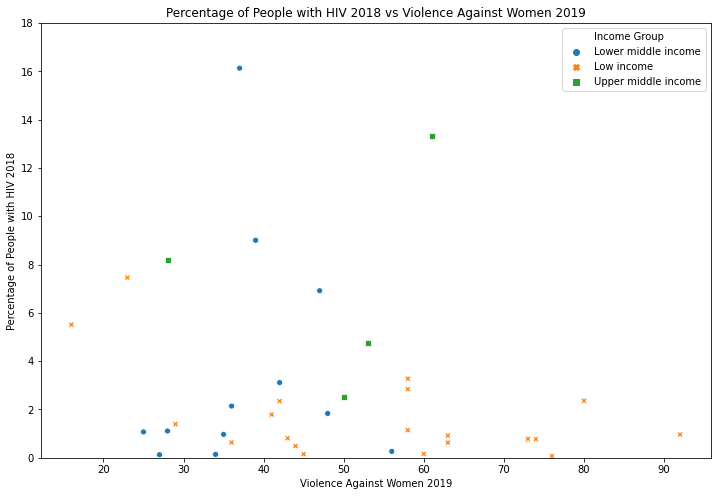

In [30]:
fig = plt.gcf()
fig.set_size_inches(12, 8)

sns.scatterplot(x="Violence Against Women 2019", y="Percentage of People with HIV 2018",
                hue="Income Group", style="Income Group",data=df_afr_wmn).set_title("Percentage of People with HIV 2018 vs Violence Against Women 2019")
plt.ylim(0, 18)

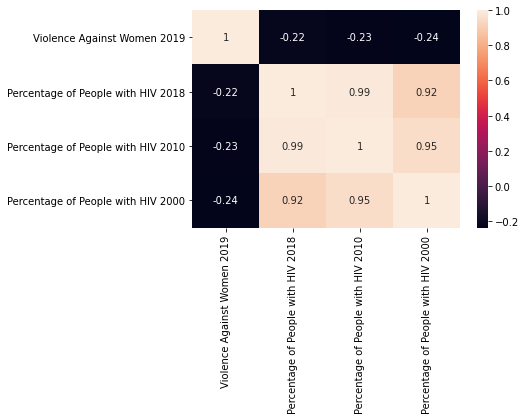

In [31]:
def n_feature_heatmap(df, feature, n=5):
    crmat = df.corr()
    cols = crmat.nlargest(n, feature).index
    sns.heatmap(crmat.loc[cols,cols],annot=True,fmt=".2g",annot_kws=None);
    
n_feature_heatmap(df_afr_wmn, "Violence Against Women 2019",n=5)

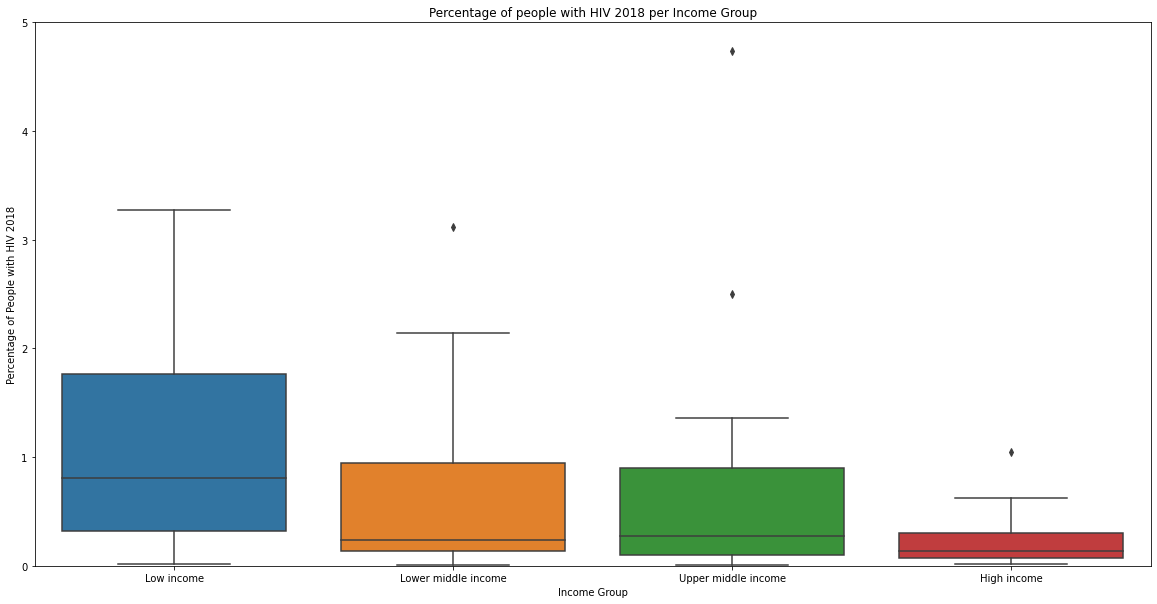

In [33]:
df_years
plt.figure(figsize=(20,10))
plt.ylim(0, 5)
sns.boxplot(x='Income Group', y="Percentage of People with HIV 2018", data=df_years,width=0.8).set_title("Percentage of people with HIV 2018 per Income Group");
plt.savefig("percentage_of_people_with_HIV_2018_perIncomeGroup.png")

We had the data for the number of people who have HIV in each country but wanted to see the percentages. The mean and maximum values for the percentage of people with HIV are lower in countries in higher income groups and they do not overlap. There are outliers in upper middle income countries, the one at the top being South Africa, with the highest percentage of people with HIV despite being an upper middle income country.

In [34]:
afr2000 = df_afr.groupby(["Income Group"])["Percentage of People with HIV 2000"].mean()
afr2010 = df_afr.groupby(["Income Group"])["Percentage of People with HIV 2010"].mean()
afr2018 = df_afr.groupby(["Income Group"])["Percentage of People with HIV 2018"].mean()

In [35]:
afr_mean = pd.DataFrame([afr2000,afr2010,afr2018])
afr_mean

Income Group,Low income,Lower middle income,Upper middle income
Percentage of People with HIV 2000,1.938405,3.576954,6.145349
Percentage of People with HIV 2010,1.741373,3.180378,7.379981
Percentage of People with HIV 2018,1.680405,3.091792,7.695789


In [36]:
afr_mean = afr_mean.stack()
afr_mean.index.names = ["Dates","Income Group"]
afr_mean = afr_mean.swaplevel("Dates","Income Group")

Text(0.5, 1.0, 'Percentage of People with HIV - Income Group - Sub-Saharan Africa')

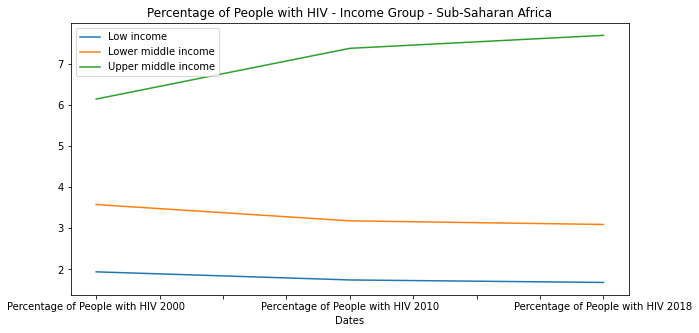

In [123]:
afr_mean["Low income"].plot(figsize=(10,5))
afr_mean["Lower middle income"].plot(figsize=(10,5))
afr_mean["Upper middle income"].plot(figsize=(10,5))
plt.legend(['Low income',"Lower middle income","Upper middle income"], loc='upper left');
plt.title("Percentage of People with HIV - Income Group - Sub-Saharan Africa")

In [ ]:
df_search1 = df_who.loc[df_who.Region=="Sub-Saharan Africa",["Country","CODE","Income Group"]]
print(df_search1.loc[df_who["Income Group"]=="Upper middle income"])

In [ ]:
df_afr.loc[df_afr["CODE"]=="ZAF",:] #South Africa

In [38]:
df_afr.loc[df_afr["CODE"]=="BWA",:] #Botswana

,CODE,Income Group,Region,Percentage of People with HIV 2000,Percentage of People with HIV 2010,Percentage of People with HIV 2018
25,BWA,Upper middle income,Sub-Saharan Africa,17.038533,17.110319,16.414344


In [39]:
df_afr.loc[df_afr["CODE"]=="GAB",:] #Gabon

,CODE,Income Group,Region,Percentage of People with HIV 2000,Percentage of People with HIV 2010,Percentage of People with HIV 2018
55,GAB,Upper middle income,Sub-Saharan Africa,2.279462,2.647555,2.500855


In [40]:
df_afr.loc[df_afr["CODE"]=="GNQ",:] #Equiatorial Guinea

,CODE,Income Group,Region,Percentage of People with HIV 2000,Percentage of People with HIV 2010,Percentage of People with HIV 2018
61,GNQ,Upper middle income,Sub-Saharan Africa,2.144574,3.709046,4.736534


In [41]:
df_afr.loc[df_afr["CODE"]=="MUS",:] #Mauritus

,CODE,Income Group,Region,Percentage of People with HIV 2000,Percentage of People with HIV 2010,Percentage of People with HIV 2018
104,MUS,Upper middle income,Sub-Saharan Africa,0.269616,0.879718,1.027422


In [42]:
df_afr.loc[df_afr["CODE"]=="NAM",:] #Namibia

,CODE,Income Group,Region,Percentage of People with HIV 2000,Percentage of People with HIV 2010,Percentage of People with HIV 2018
107,NAM,Upper middle income,Sub-Saharan Africa,7.801307,8.023129,8.169084


## Men who have sex with men (MSM)

https://www.avert.org/professionals/hiv-around-world/sub-saharan-africa/south-africa
"Men who have sex with men (MSM)

HIV prevalence among men who have sex with men (sometimes referred to as MSM) in South Africa is now estimated at 26.8%. 20 This varies geographically but it is reported to have risen by more than 10% in Johannesburg, Cape Town and Durban since 2008.21

<b>Despite a constitution that protects the rights of LGBT communities, many men who have sex with men face high levels of social stigma and homophobic violence as a result of traditional and conservative attitudes within the general population.</b> There is also a lack of knowledge around the issues that face men who have sex with men, this makes it difficult for these men to disclose their sexuality to healthcare workers and get the healthcare they need."

As the above link suggests homophobic violence and conservative attitudes can prevent sexual minorities to get the healthcare they need. Our hypothesis was that there is a correlation between LGBT right in the country and HIV prevalence among MSM. Considering this information, we wanted to take a look at the countries that have the lowest and highest HIV prevalence among men who have sex with men in the Sub-Saharan Africa. The difference between two sets of countries is dramatic with the lowest 1.2% and the highest 34.4. 

So, at first we manually did research about the countries that came up in the results. Consistently, the countries with the low numbers seemed to be pioneers on LGBT rights in that region and the people in countries with the high numbers are heavily discriminated. Afterwards, in order to observe the correlation between data, we have downloaded a dataset on same sex marriage. Our visualization did not refute our hypothesis.

In [43]:
df_search_afr = df_who.loc[df_who.Region=="Sub-Saharan Africa",["Country","Income Group","HIV prevalence among men who have sex with men (2018)"]]
df_search_afr.loc[df_search_afr["HIV prevalence among men who have sex with men (2018)"]<5.0,:]

,Country,Income Group,HIV prevalence among men who have sex with men (2018)
1,Angola,Lower middle income,2.0
10,Burundi,Low income,4.8
13,Burkina Faso,Low income,1.9
60,Guinea-Bissau,Low income,3.0
126,Rwanda,Low income,4.0
128,Sudan,Lower middle income,1.2


#### LGBT Rights in Angola
https://en.wikipedia.org/wiki/LGBT_rights_in_Angola
"Some NGOs in Angola, that are working on HIV/AIDS education, are beginning to work with the LGBT community, and there are no reports of LGBT people being specifically targeted for harassment in Angola by police or vigilante groups. Additionally, two specific LGBT groups operate in Angola. However, only one of these groups has received official and legal recognition."

#### LGBT Rights in Burkina Faso
https://en.wikipedia.org/wiki/LGBT_rights_in_Burkina_Faso
"Both male and female same-sex sexual activity has always been legal in Burkina Faso. Age of consent is equal, regardless of sex since 1996."

#### LGBT Rights in Guinea-Bissau
https://en.wikipedia.org/wiki/LGBT_rights_in_Guinea-Bissau
"Both male and female same-sex sexual acts are legal since 1993 in Guinea-Bissau.[1]
In December 2008, Guinea-Bissau became one of 66 nations to sign the "United Nations Statement on Human Rights, Sexual Orientation and Gender Identity", which supports decriminalization of homosexuality and transgender identity."

#### LGBT Rights in Rwanda
https://en.wikipedia.org/wiki/LGBT_rights_in_Rwanda
"LGBT Rwandans have reported being harassed, blackmailed, and even arrested by the police under various laws dealing with public order and morality.
<b>Despite this, Rwanda is considered a leader in the progress on human rights for LGBT persons in East Africa.Rwanda is a signatory of the United Nations joint statement condemning violence against LGBT people, being one of the only few countries in Africa to have sponsored the declaration, and stands in sharp contrast with neighbouring Uganda, Tanzania and Burundi.</b>"

In [44]:
df_search_afr.loc[df_search_afr["HIV prevalence among men who have sex with men (2018)"]>15.0,:]

,Country,Income Group,HIV prevalence among men who have sex with men (2018)
32,Cameroon,Lower middle income,20.6
57,Ghana,Lower middle income,18.0
59,Gambia,Low income,34.4
80,Kenya,Lower middle income,18.2
86,Liberia,Low income,19.8
89,Lesotho,Lower middle income,32.9
104,Mauritius,Upper middle income,17.2
109,Nigeria,Lower middle income,23.0
129,Senegal,Lower middle income,27.6
141,Togo,Low income,22.0


#### LGBT Rights in Gambia
https://en.wikipedia.org/wiki/LGBT_rights_in_the_Gambia
Both male and female same-sex sexual activity is illegal in the Gambia.
Former Gambian President Yahya Jammeh said in May 2008 that laws "stricter than those in Iran" against homosexuals would soon be introduced and vowed to "cut off the head" of any homosexual caught in the country.

#### LGBT Rights in Lesotho
https://en.wikipedia.org/wiki/LGBT_rights_in_Lesotho
"LGBT people face societal rejection and discrimination in Lesotho. Nevertheless, attitudes towards members of the LGBT community are slowly evolving and becoming more tolerant and accepting, in line with worldwide trends. In 2012, Lesotho legalised homosexuality, and on 18 May 2013, the first gay pride march took place in the country."
Things are getting better in line with the worlwide trends but the developments are recent.
#### LGBT Rights in Senegal
https://en.wikipedia.org/wiki/LGBT_rights_in_Senegal
"Senegal specifically outlaws same-sex sexual acts and, in the past, has prosecuted men accused of homosexuality. LGBT persons face routine discrimination in society."

#### LGBT Rights in Nigeria
https://en.wikipedia.org/wiki/LGBT_rights_in_Nigeria
"Very few LGBT persons are open about their orientation, and violence against LGBT people is frequent.
Both male and female same-sex sexual activity is illegal in Nigeria. The maximum punishment in the twelve northern states that have adopted Shari'a law is death by stoning."

In [81]:
#https://ilga.org/maps-sexual-orientation-laws
df_lgbt = pd.read_excel("ILGA_State_Sponsored_Homophobia_2019_dataset.xlsx")
df_lgbt = df_lgbt.drop(["N","CN","S","S.1","Unnamed: 8","Unnamed: 9"],axis=1)

df_lgbt

,CONTINENT,COUNTRY,2017,2019
0,AFRICA,Algeria,ILLEGAL,ILLEGAL
1,AFRICA,Angola,ILLEGAL,LEGAL
2,AFRICA,Benin,LEGAL,LEGAL
3,AFRICA,Botswana,ILLEGAL,ILLEGAL
4,AFRICA,Burkina Faso,LEGAL,LEGAL
...,...,...,...,...
235,NaN,NaN,NaN,T & Tobago
236,NaN,NaN,NaN,India
237,NaN,NaN,NaN,Angola
238,NaN,NaN,NaN,Chad


In [82]:
df_lgbt = df_lgbt.loc[df_lgbt.CONTINENT=="AFRICA"]

In [83]:
df_search_afr  = pd.merge(df_search_afr, df_lgbt, left_on="Country",right_on="COUNTRY")
df_search_afr.columns = ["Country","Income Group","HIV prevalence among men who have sex with men (2018)",
                          "CONTINENT","COUNTRY","Same sex marriage 2017","Same sex marriage 2019"]
df_search_afr = df_search_afr.drop(["Income Group","CONTINENT","COUNTRY","Same sex marriage 2017"],axis=1)

legal = (df_search_afr["Same sex marriage 2019"]=="LEGAL")

df_search_afr["Same sex marriage 19"] = legal
df_search_afr["Same sex marriage 19"] *= 1
df_search_afr

,Country,HIV prevalence among men who have sex with men (2018),Same sex marriage 2019,Same sex marriage 19
0,Angola,2.0,LEGAL,1
1,Burundi,4.8,ILLEGAL,0
2,Benin,7.0,LEGAL,1
3,Burkina Faso,1.9,LEGAL,1
4,Botswana,14.8,ILLEGAL,0
...,...,...,...,...
36,Togo,22.0,ILLEGAL,0
37,Tanzania,8.4,ILLEGAL,0
38,Uganda,13.2,ILLEGAL,0
39,Zambia,NaN,ILLEGAL,0


ValueError


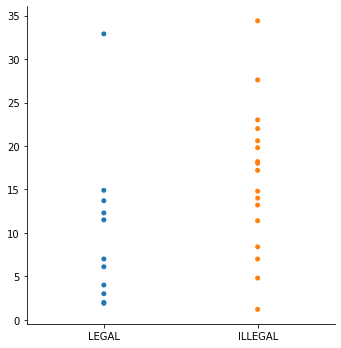

In [84]:
x = df_search_afr.loc[:,"HIV prevalence among men who have sex with men (2018)"]
y = df_search_afr.loc[:,"Same sex marriage 2019"]
try:
    sns.catplot(y, x, jitter=False, data=df_search_afr)
except:
    print("ValueError")

### Missing Values

In [85]:
print(df_who.isnull().sum(axis=0))
df_missing = df_who.isnull().sum(axis=0)
num_missing = df_missing.sum()

print(num_missing);

CODE                                                                                         0
Population 2000                                                                              0
Population 2010                                                                              0
Population 2018                                                                              1
Country                                                                                      0
Number of people (all ages) living with HIV in 2018                                          0
Number of people (all ages) living with HIV in 2010                                          0
Number of people (all ages) living with HIV in 2000                                          0
Number of new HIV infections in 2018                                                         0
HIV incidence rate (per 1000 uninfected population) in 2018                                  0
Estimated antiretroviral therapy coverage among pe

In [86]:
abs_important = ['Country', 'Number of people (all ages) living with HIV in 2018',
       'Number of people (all ages) living with HIV in 2010',
       'Number of people (all ages) living with HIV in 2000',
       'HIV incidence rate (per 1000 uninfected population) in 2018']
df_abs = df_who[abs_important]
df_abs.dropna(axis=0, how='any', thresh=4, subset=None, inplace=True)
hivIR = pd.read_csv('New HIV infections_Number of new HIV infections_Population_ All ages.csv')
newcols = []
for cols in hivIR:
    newcols.append(cols.split()[0])
hivIR.columns = newcols
cols = ['Country','2000','2010','2018']
hivIR = hivIR[cols]
hivIR = hivIR.replace(["... ",' ...','...'], np.nan)
hivIR.dropna(axis=0, how='any', thresh=3, subset=None, inplace=True)
for index, row in df_who.iterrows():
     # access data using column names
    if index not in df_abs.Country:
        df_who.drop([index], inplace = True)


/Users/onur/ml/hands_on_ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [87]:
print(df_who.isnull().sum(axis=0))
df_missing = df_who.isnull().sum(axis=0)
num_missing = df_missing.sum()

print(num_missing)

CODE                                                                                         0
Population 2000                                                                              0
Population 2010                                                                              0
Population 2018                                                                              1
Country                                                                                      0
Number of people (all ages) living with HIV in 2018                                          0
Number of people (all ages) living with HIV in 2010                                          0
Number of people (all ages) living with HIV in 2000                                          0
Number of new HIV infections in 2018                                                         0
HIV incidence rate (per 1000 uninfected population) in 2018                                  0
Estimated antiretroviral therapy coverage among pe

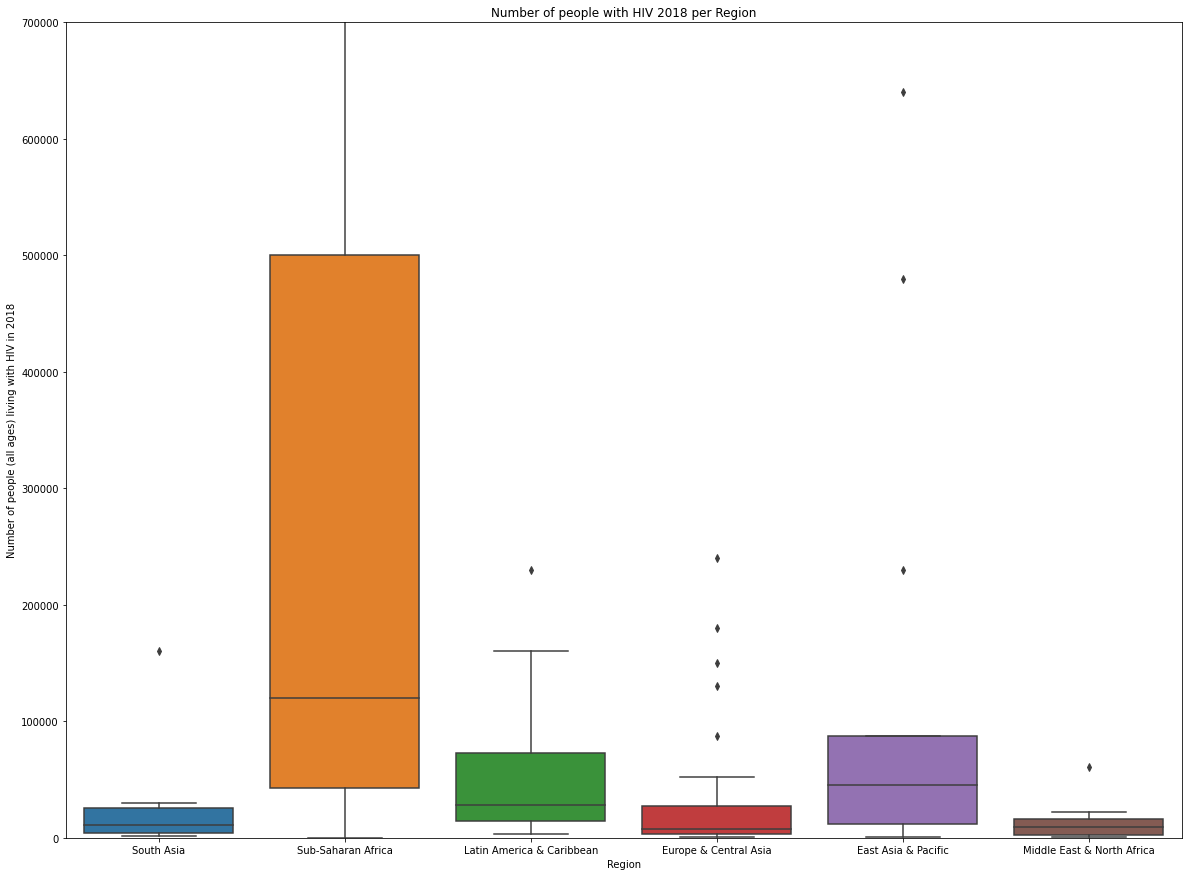

In [88]:
plt.figure(figsize=(20,15))
plt.ylim(0, 700000)
sns.boxplot(x='Region', y="Number of people (all ages) living with HIV in 2018", data=df_who,width=0.8).set_title("Number of people with HIV 2018 per Region");

In [89]:
df_who

,CODE,Population 2000,Population 2010,Population 2018,Country,Number of people (all ages) living with HIV in 2018,Number of people (all ages) living with HIV in 2010,Number of people (all ages) living with HIV in 2000,Number of new HIV infections in 2018,HIV incidence rate (per 1000 uninfected population) in 2018,Estimated antiretroviral therapy coverage among people living with HIV (%) in 2018,Reported number of people receiving antiretroviral therapy in 2018,Number of deaths due to HIV AIDS in 2018,Number of deaths due to HIV AIDS in 2010,Number of deaths due to HIV AIDS in 2000,Estimated antiretroviral therapy coverage among children in 2018,Estimated number of children needing antiretroviral therapy based on WHO methods in 2018,Region,Income Group,GDP (BILLIONS),Violence Against Women 2019,Men who have sex with men (2018),HIV prevalence among men who have sex with men (2018),People living with HIV who know their status (%) 2015,People living with HIV who know their status (%) 2016,People living with HIV who know their status (%) 2017,People living with HIV who know their status (%) 2018
0,AFG,20779953.0,29185507.0,37172386.0,Afghanistan,7200.0,4200.0,1600.0,840.0,0.02,13.0,60.0,500.0,500.0,100.0,17.0,500.0,South Asia,Low income,21.71,80.0,10700.0,0.5,...,...,37,38
1,AGO,16395473.0,23356246.0,30809762.0,Angola,330000.0,220000.0,87000.0,28000.0,1.01,27.0,4800.0,14000.0,10000.0,4800.0,13.0,38000.0,Sub-Saharan Africa,Lower middle income,131.40,25.0,29400.0,2.0,36,36,39,42
4,ARG,36870787.0,40788453.0,44494502.0,Argentina,140000.0,110000.0,64000.0,6500.0,0.15,61.0,1700.0,1700.0,1600.0,1400.0,92.0,1800.0,Latin America & Caribbean,Upper middle income,536.20,12.0,205600.0,15.7,...,...,...,...
5,ARM,3069591.0,2877319.0,2951776.0,Armenia,3500.0,3300.0,950.0,200.0,0.06,53.0,NaN,200.0,200.0,100.0,NaN,NaN,Europe & Central Asia,Upper middle income,10.88,10.0,16100.0,1.9,52,57,65,73
7,AUS,19153000.0,22031750.0,24992369.0,Australia,28000.0,21000.0,13000.0,1000.0,0.04,83.0,NaN,200.0,500.0,500.0,NaN,100.0,East Asia & Pacific,High income,1483.00,3.0,263500.0,18.3,90,91,92,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,VNM,79910412.0,87967651.0,95540395.0,Vietnam,230000.0,220000.0,120000.0,5700.0,0.06,65.0,4600.0,4700.0,8500.0,6100.0,92.0,5000.0,East Asia & Pacific,Lower middle income,187.80,28.0,200000.0,10.8,...,...,...,...
156,YEM,17409072.0,23154855.0,28498687.0,Yemen,11000.0,5100.0,1100.0,1100.0,0.04,21.0,130.0,500.0,200.0,100.0,33.0,500.0,Middle East & North Africa,Low income,45.45,49.0,44000.0,5.9,...,...,...,...
157,ZAF,44967708.0,51216964.0,57779622.0,South Africa,7700000.0,6100000.0,3300000.0,240000.0,4.94,62.0,163000.0,71000.0,140000.0,100000.0,63.0,260000.0,Sub-Saharan Africa,Upper middle income,341.20,61.0,299000.0,18.1,85,87,89,90
158,ZMB,10415944.0,13605984.0,17351822.0,Zambia,1200000.0,1000000.0,890000.0,48000.0,2.97,78.0,49100.0,17000.0,26000.0,62000.0,79.0,62000.0,Sub-Saharan Africa,Lower middle income,25.61,47.0,NaN,NaN,NaN,NaN,NaN,NaN


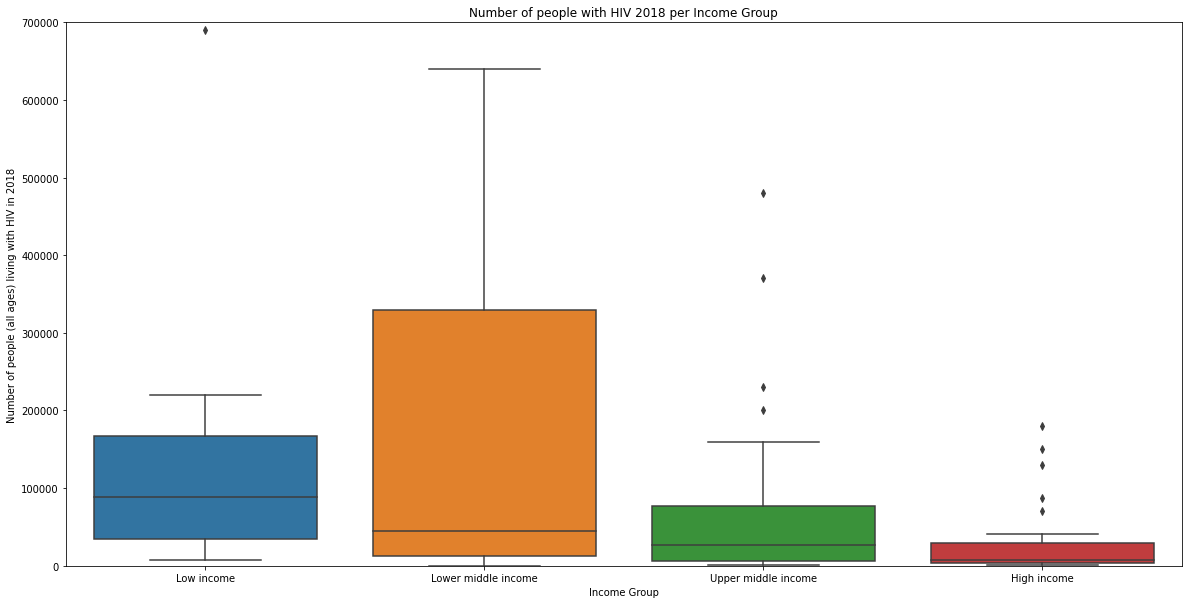

In [90]:
plt.figure(figsize=(20,10))
plt.ylim(0, 700000)
sns.boxplot(x='Income Group', y="Number of people (all ages) living with HIV in 2018", data=df_who,width=0.8).set_title("Number of people with HIV 2018 per Income Group");

In [91]:
df_who.groupby('Region')[['Number of people (all ages) living with HIV in 2018']].mean()

,Number of people (all ages) living with HIV in 2018
Region,
East Asia & Pacific,131853.846154
Europe & Central Asia,36162.068966
Latin America & Caribbean,89545.833333
Middle East & North Africa,12895.384615
South Asia,36000.000000
Sub-Saharan Africa,580260.465116


In [92]:
df_who.groupby('Income Group')[['Number of people (all ages) living with HIV in 2018']].mean()

,Number of people (all ages) living with HIV in 2018
Income Group,
High income,30801.481481
Low income,309471.428571
Lower middle income,280145.714286
Upper middle income,288021.052632


In [93]:
df_who.groupby('Region').size()

Region
East Asia & Pacific           13
Europe & Central Asia         29
Latin America & Caribbean     24
Middle East & North Africa    13
South Asia                     6
Sub-Saharan Africa            43
dtype: int64

## People living with HIV who know their status

"Knowledge of HIV Status is on the Rise"
https://www.hiv.gov/blog/knowledge-hiv-status-rise
In his article, Richard Wolitski mentions the target which was set by the National HIV/AIDS Strategy of the U.S. "for increasing the percentage of people living with HIV who know their serostatus to at least 90% by 2020".

After grouping 

In [94]:
cols = ["Country","CODE","Region","People living with HIV who know their status (%) 2015","People living with HIV who know their status (%) 2016"
       ,"People living with HIV who know their status (%) 2017","People living with HIV who know their status (%) 2018"]
df_status = df_who[cols]

In [95]:
for col in df_status.columns[3:7]:
    turn_column_int(df_status,col)
    
def turn_str_nan(df, column_name):
    data_dict = {column_name: []}
    
    for val in df[column_name]:
        if type(val)==str:
            val = np.nan
            data_dict[column_name].append(val)
            continue
        data_dict[column_name].append(val)
        
    df_col = pd.DataFrame(data_dict)
    df[column_name] = df_col

for col in df_status.columns[3:7]:
    turn_str_nan(df_status,col)

/Users/onur/ml/hands_on_ml/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [96]:
df_status

,Country,CODE,Region,People living with HIV who know their status (%) 2015,People living with HIV who know their status (%) 2016,People living with HIV who know their status (%) 2017,People living with HIV who know their status (%) 2018
0,Afghanistan,AFG,South Asia,NaN,NaN,37.0,38.0
1,Angola,AGO,Sub-Saharan Africa,36.0,36.0,39.0,42.0
4,Argentina,ARG,Latin America & Caribbean,57.0,60.0,65.0,70.0
5,Armenia,ARM,Europe & Central Asia,NaN,NaN,NaN,NaN
7,Australia,AUS,East Asia & Pacific,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
155,Vietnam,VNM,East Asia & Pacific,NaN,NaN,NaN,NaN
156,Yemen,YEM,Middle East & North Africa,NaN,NaN,NaN,NaN
157,South Africa,ZAF,Sub-Saharan Africa,NaN,NaN,NaN,NaN
158,Zambia,ZMB,Sub-Saharan Africa,NaN,NaN,NaN,NaN


In [97]:
status2015 = df_status.groupby(["Region"])["People living with HIV who know their status (%) 2015"].mean()
status2016 = df_status.groupby(["Region"])["People living with HIV who know their status (%) 2016"].mean()
status2017 = df_status.groupby(["Region"])["People living with HIV who know their status (%) 2017"].mean()
status2018 = df_status.groupby(["Region"])["People living with HIV who know their status (%) 2018"].mean()

In [98]:
region_status = pd.concat([status2015,status2016,status2017,status2018],axis=1)
region_status

,People living with HIV who know their status (%) 2015,People living with HIV who know their status (%) 2016,People living with HIV who know their status (%) 2017,People living with HIV who know their status (%) 2018
Region,,,,
East Asia & Pacific,62.00,63.666667,65.333333,66.666667
Europe & Central Asia,72.50,75.000000,79.090909,78.923077
Latin America & Caribbean,49.00,52.166667,57.857143,57.714286
Middle East & North Africa,58.60,62.000000,65.400000,61.857143
South Asia,62.00,72.666667,59.000000,62.000000
Sub-Saharan Africa,56.25,57.846154,62.785714,66.500000


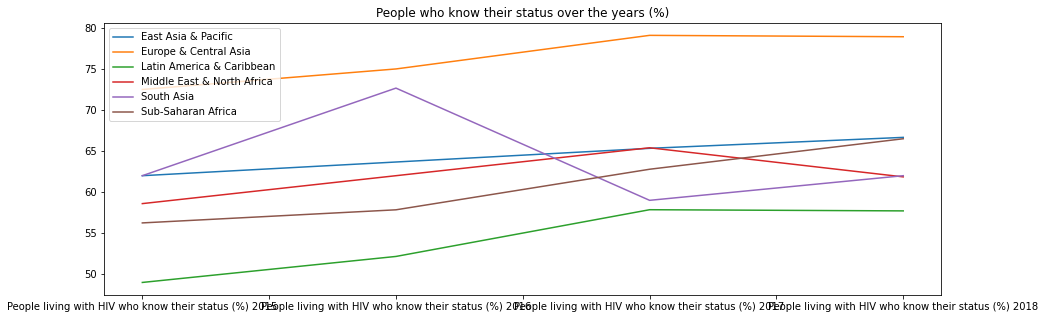

In [122]:
for i in range(6):
    region_status.iloc[i,:].plot(figsize=(15,5))

plt.title("People who know their status over the years (%)")
plt.legend(['East Asia & Pacific',"Europe & Central Asia","Latin America & Caribbean", "Middle East & North Africa","South Asia","Sub-Saharan Africa"], loc='upper left');

In [100]:
people2000 = df_who.groupby(["Region"])["Number of people (all ages) living with HIV in 2000"].mean()
people2010 = df_who.groupby(["Region"])["Number of people (all ages) living with HIV in 2010"].mean()
people2018 = df_who.groupby(["Region"])["Number of people (all ages) living with HIV in 2018"].mean()
df_people = pd.concat([people2000,people2010,people2018],axis=1)
df_people

,Number of people (all ages) living with HIV in 2000,Number of people (all ages) living with HIV in 2010,Number of people (all ages) living with HIV in 2018
Region,,,
East Asia & Pacific,86361.538462,121184.615385,131853.846154
Europe & Central Asia,18795.517241,29903.448276,36162.068966
Latin America & Caribbean,53133.333333,70920.833333,89545.833333
Middle East & North Africa,3558.461538,8723.076923,12895.384615
South Asia,3628.333333,19200.000000,36000.000000
Sub-Saharan Africa,389704.651163,484776.744186,580260.465116


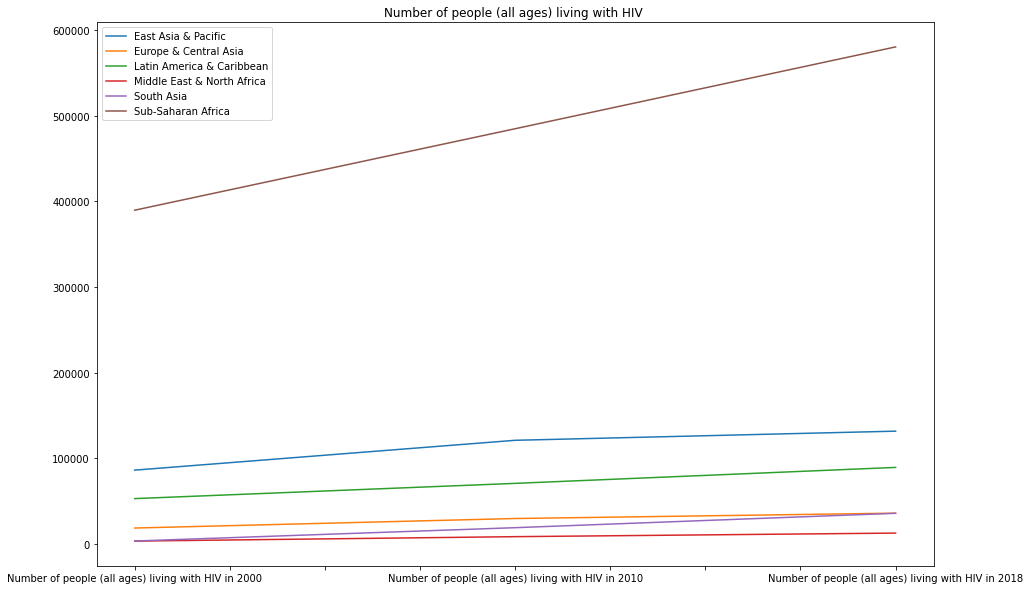

In [103]:
for i in range(6):
    df_people.iloc[i,:].plot(figsize=(15,10))
    
plt.title("Number of people (all ages) living with HIV ")
plt.legend(['East Asia & Pacific',"Europe & Central Asia","Latin America & Caribbean", "Middle East & North Africa","South Asia","Sub-Saharan Africa"], loc='upper left');

In [104]:
#Lose the missing values
df_years.dropna(axis=0, how='any', thresh=6, subset=None, inplace=True)

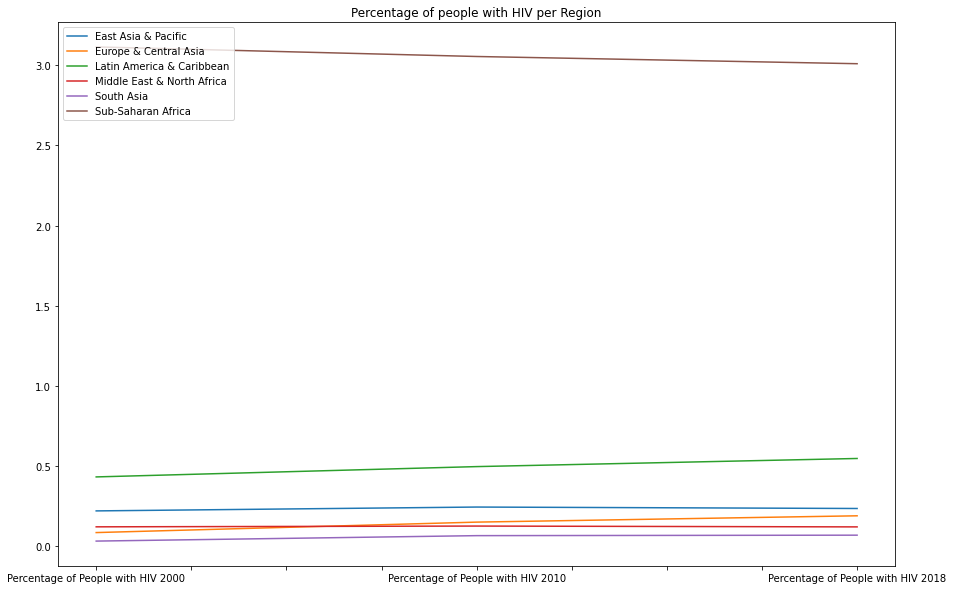

In [106]:
years2000 = df_years.groupby(["Region"])["Percentage of People with HIV 2000"].mean()
years2010 = df_years.groupby(["Region"])["Percentage of People with HIV 2010"].mean()
years2018 = df_years.groupby(["Region"])["Percentage of People with HIV 2018"].mean()
df_p = pd.concat([years2000,years2010,years2018],axis=1)
for i in range(6):
    df_p.iloc[i,:].plot(figsize=(15,10))
plt.title("Percentage of people with HIV per Region")
plt.legend(['East Asia & Pacific',"Europe & Central Asia","Latin America & Caribbean", "Middle East & North Africa","South Asia","Sub-Saharan Africa"], loc='upper left');

In [107]:
df_years.loc[df_years.Region=="Latin America & Caribbean",:]

,CODE,Income Group,Region,Percentage of People with HIV 2000,Percentage of People with HIV 2010,Percentage of People with HIV 2018
4,ARG,Upper middle income,Latin America & Caribbean,0.173579,0.269684,0.314646
19,BLZ,Upper middle income,Latin America & Caribbean,0.687382,1.147415,1.279136
20,BOL,Lower middle income,Latin America & Caribbean,0.249458,0.228888,0.193779
21,BRA,Upper middle income,Latin America & Caribbean,0.234567,0.342337,0.429657
22,BRB,High income,Latin America & Caribbean,0.405134,0.815224,1.046605
29,CHL,High income,Latin America & Caribbean,0.091251,0.228571,0.379088
34,COL,Upper middle income,Latin America & Caribbean,0.277568,0.287466,0.322264
37,CRI,Upper middle income,Latin America & Caribbean,0.108521,0.203173,0.300034
38,CUB,Upper middle income,Latin America & Caribbean,0.036849,0.151436,0.273414
44,DOM,Upper middle income,Latin America & Caribbean,1.003385,0.742642,0.658689


## Heatmap

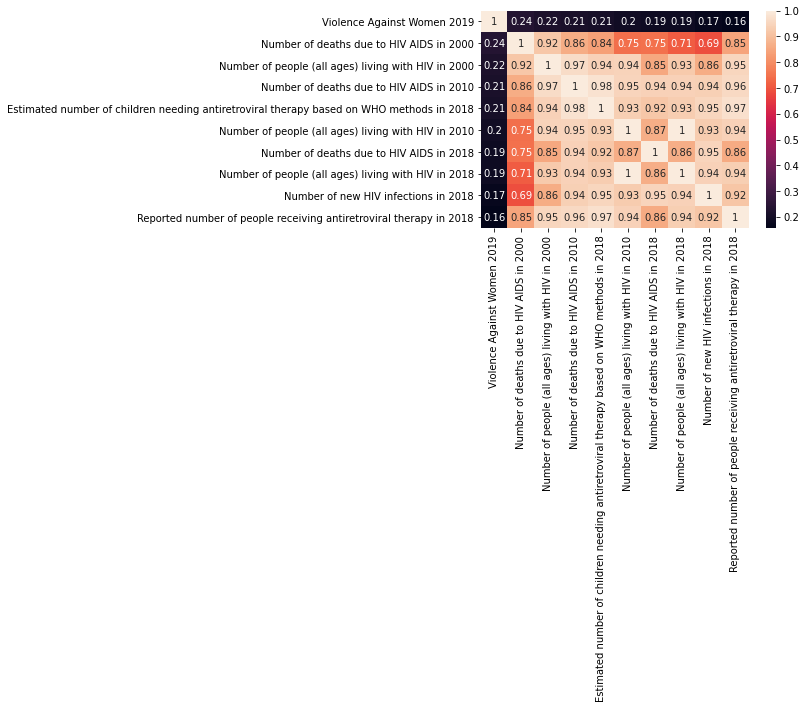

In [108]:
def n_feature_heatmap(df, feature, n=5):
    crmat = df.corr()
    cols = crmat.nlargest(n, feature).index
    sns.heatmap(crmat.loc[cols,cols],annot=True,fmt=".2g",annot_kws=None);
    
n_feature_heatmap(df_who, "Violence Against Women 2019",n=10)


## Socioeconomic Status

https://www.apa.org/pi/ses/resources/publications/hiv-aids
A lack of socioeconomic resources is linked to the practice of riskier health behaviors, which can lead to the contraction of HIV. These behaviors include substance use, which reduces the likelihood of using condoms 

Limited economic opportunities and periods of <b>homelessness</b> have been associated with risky sexual practices, such as exchanging sex for money, drugs, housing, food and safety. Ultimately, these practices can place individuals at risk for HIV

Living in poverty can also result in <b>food insufficiency</b>, which can contribute to HIV/AIDS infection. Lacking food can result in transactional sex and power differences in sexual relationships, which can place an individual at risk of infection.

Studies of urban health have found that factors such as level of poverty and unemployment, vacant buildings and high crime rates are all associated with increased risk of HIV infection. <b>These factors are all highly correlated, however, making it difficult to isolate the mechanisms that promote HIV infection</b> (Latkin, German, Vlahov, & Galea, 2013).

Rural residents face unique challenges such as distance to care, lack of health care facilities and health care providers with HIV/AIDS expertise, limited availability of supportive or ancillary services, stigma and discrimination, and limited educational and economic infrastructure
 
<b>Income inequality has been found to be related to increased HIV risk for males, whereas poverty, health and housing circumstances increased risk for females</b> (Buot et al., 2014). However, for both men and women, <b>increased poverty and unemployment levels</b> and <b>decreased median household income</b> are related to a lower probability of survival after an HIV diagnosis (Harrison, Ling, Song, & Hall , 2008). Other SES indicators, including <b>poverty, homelessness, hunger and lower education</b>, have also been associated with higher mortality (McMahon, Wanke, Terrin, Skinner, & Knox, 2011).

In [109]:
#unemployment, food insufficiency, income inequality, homelessness, median household income, hunger, lower education
#https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS?end=2019&start=2000

file = "unemployment_worldbank.csv"
df_socio = pd.read_csv(file)

df_unemp1 = df_socio[["Country Name","Country Code"]]
df_unemp2 = df_socio.iloc[:,-3:-2]
df_socio = pd.concat([df_unemp1,df_unemp2],axis=1)

In [110]:
#school enrollment
df_school = pd.read_csv("school_enrollment.csv")
df_school1 = df_school["2018"].combine_first(df_school["2017"])

df_school1 = df_school1.combine_first(df_school["2016"])
df_school1 = df_school1.combine_first(df_school["2015"])
df_school1 = df_school1.combine_first(df_school["2014"])
df_socio = pd.concat([df_socio, df_school1],axis=1)

df_incomepercapita = pd.read_csv("Adjusted_net_national_income_per_capita.csv")
df_incomepercapita = df_incomepercapita.iloc[:,-4:-3]
df_socio = pd.concat([df_socio, df_incomepercapita],axis=1)

In [111]:
df_socio.columns = ["Country Name","Country Code","Unemployment 2018 (%)","School Enrollment 2018 (%)","Adjusted net national income per capita 2017"]
df_socio

,Country Name,Country Code,Unemployment 2018 (%),School Enrollment 2018 (%),Adjusted net national income per capita 2017
0,Aruba,ABW,NaN,117.10810,21385.451665
1,Afghanistan,AFG,1.542,102.31050,466.079081
2,Angola,AGO,7.253,113.47800,2148.272969
3,Albania,ALB,13.898,106.99340,4105.150515
4,Andorra,AND,NaN,NaN,NaN
...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,12.934,93.63748,1060.494887
261,South Africa,ZAF,26.958,100.86470,4941.627549
262,Zambia,ZMB,7.209,98.71552,1129.393375


The Gini coefficient is a measure of statistical dispersion intended to represent the income or wealth distribution of a nation's residents, and is the most commonly used measurement of inequality.

A Gini coefficient of one (or 100%) expresses maximal inequality among values (e.g., for a large number of people, where only one person has all the income or consumption, and all others have none, the Gini coefficient will be very nearly one).

In [112]:
#https://data.worldbank.org/indicator/SI.POV.GINI
df_gini = pd.read_csv("gini_index.csv")
df_gini
df_gini1 = df_gini["2018"].combine_first(df_gini["2017"])
years = list(range(1960,2020,))
years = list(reversed(years))
for year in years:
    df_gini1 = df_gini1.combine_first(df_gini[str(year)])
    
df_socio = pd.concat([df_socio, df_gini1],axis=1)

In [113]:
df_socio

,Country Name,Country Code,Unemployment 2018 (%),School Enrollment 2018 (%),Adjusted net national income per capita 2017,2018
0,Aruba,ABW,NaN,117.10810,21385.451665,NaN
1,Afghanistan,AFG,1.542,102.31050,466.079081,NaN
2,Angola,AGO,7.253,113.47800,2148.272969,42.7
3,Albania,ALB,13.898,106.99340,4105.150515,29.0
4,Andorra,AND,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,29.0
260,"Yemen, Rep.",YEM,12.934,93.63748,1060.494887,36.7
261,South Africa,ZAF,26.958,100.86470,4941.627549,63.0
262,Zambia,ZMB,7.209,98.71552,1129.393375,57.1


In [114]:
#tuberculosis
df_tub = pd.read_csv("tuberculosis_incidence.csv")
df_socio = pd.concat([df_socio, df_tub.iloc[:,-3]],axis=1)

In [115]:
df_socio.columns = ["Country Name","Country Code","Unemployment 2018 (%)","School Enrollment 2018 (%)",
                    "Adjusted net national income per capita 2017","GINI Index","Incidence of Tuberculosis 2018"]

In [116]:
#hiv prevalence all
#https://data.worldbank.org/indicator/SH.DYN.AIDS.ZS
df_hiv = pd.read_csv("hiv_prevalence_all.csv")
df_socio = pd.concat([df_socio, df_hiv.iloc[:,-3]],axis=1)

In [117]:
#hiv prevalence female
df_hiv_f = pd.read_csv("hiv_prevalence_female.csv")
df_socio = pd.concat([df_socio, df_hiv_f.iloc[:,-3]],axis=1)

In [118]:
df_socio.columns = ["Country Name","Country Code","Unemployment 2018 (%)","School Enrollment 2018 (%)",
                    "Adjusted net national income per capita 2017","GINI Index","Incidence of Tuberculosis 2018",
                   "HIV Prevalence(%)(ages 15-49)","Female HIV Prevalence(%)(ages 15-49)"]

In [119]:
#hiv prevalence male
df_hiv_m = pd.read_csv("hiv_prevelance_male.csv")
df_socio = pd.concat([df_socio, df_hiv_m.iloc[:,-3]],axis=1)

In [74]:
df_socio

,Country Name,Country Code,Unemployment 2018 (%),School Enrollment 2018 (%),Adjusted net national income per capita 2017,GINI Index,Incidence of Tuberculosis 2018,HIV Prevalence(%)(ages 15-49),Female HIV Prevalence(%)(ages 15-49),2018
0,Aruba,ABW,NaN,117.10810,21385.451665,NaN,5.4,NaN,NaN,NaN
1,Afghanistan,AFG,1.542,102.31050,466.079081,NaN,189.0,0.1,0.1,0.1
2,Angola,AGO,7.253,113.47800,2148.272969,42.7,355.0,2.0,1.2,0.3
3,Albania,ALB,13.898,106.99340,4105.150515,29.0,18.0,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,12.934,93.63748,1060.494887,36.7,48.0,0.1,0.1,0.1
261,South Africa,ZAF,26.958,100.86470,4941.627549,63.0,520.0,20.4,11.3,3.7
262,Zambia,ZMB,7.209,98.71552,1129.393375,57.1,346.0,11.3,5.0,2.4


In [75]:
df_socio.columns = ["Country Name","Country Code","Unemployment 2018 (%)","School Enrollment 2018 (%)",
                    "Adjusted net national income per capita 2017","GINI Index","Incidence of Tuberculosis 2018",
                   "HIV Prevalence(%)(ages 15-49)","Female HIV Prevalence(%)(ages 15-49)","Male HIV Prevalence(%)(ages 15-49)"]

In [76]:
df_socio

,Country Name,Country Code,Unemployment 2018 (%),School Enrollment 2018 (%),Adjusted net national income per capita 2017,GINI Index,Incidence of Tuberculosis 2018,HIV Prevalence(%)(ages 15-49),Female HIV Prevalence(%)(ages 15-49),Male HIV Prevalence(%)(ages 15-49)
0,Aruba,ABW,NaN,117.10810,21385.451665,NaN,5.4,NaN,NaN,NaN
1,Afghanistan,AFG,1.542,102.31050,466.079081,NaN,189.0,0.1,0.1,0.1
2,Angola,AGO,7.253,113.47800,2148.272969,42.7,355.0,2.0,1.2,0.3
3,Albania,ALB,13.898,106.99340,4105.150515,29.0,18.0,NaN,NaN,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,12.934,93.63748,1060.494887,36.7,48.0,0.1,0.1,0.1
261,South Africa,ZAF,26.958,100.86470,4941.627549,63.0,520.0,20.4,11.3,3.7
262,Zambia,ZMB,7.209,98.71552,1129.393375,57.1,346.0,11.3,5.0,2.4


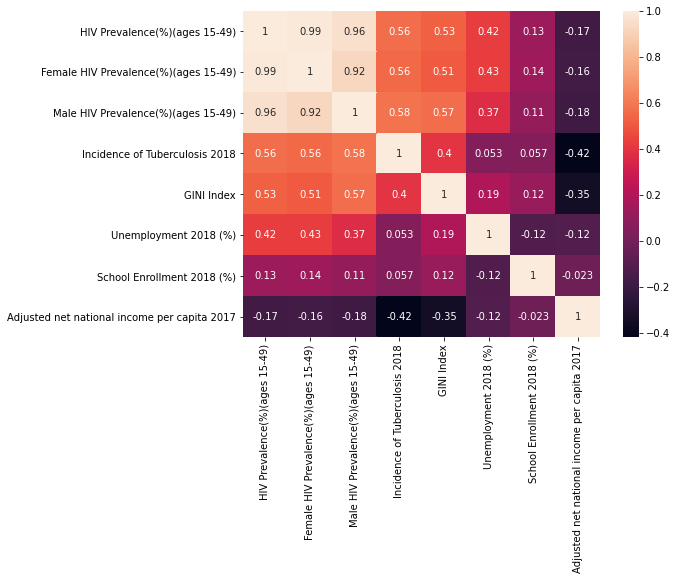

In [77]:
print()
def n_feature_heatmap(df, feature, n=5):
    crmat = df.corr()
    cols = crmat.nlargest(n, feature).index
    plt.subplots(figsize=(8,6))
    sns.heatmap(crmat.loc[cols,cols],annot=True,fmt=".2g",annot_kws=None)
    
n_feature_heatmap(df_socio, "HIV Prevalence(%)(ages 15-49)",n=10)

Text(0.5, 1.0, 'HIV Prevalence (%) vs Socioeconomic factors')

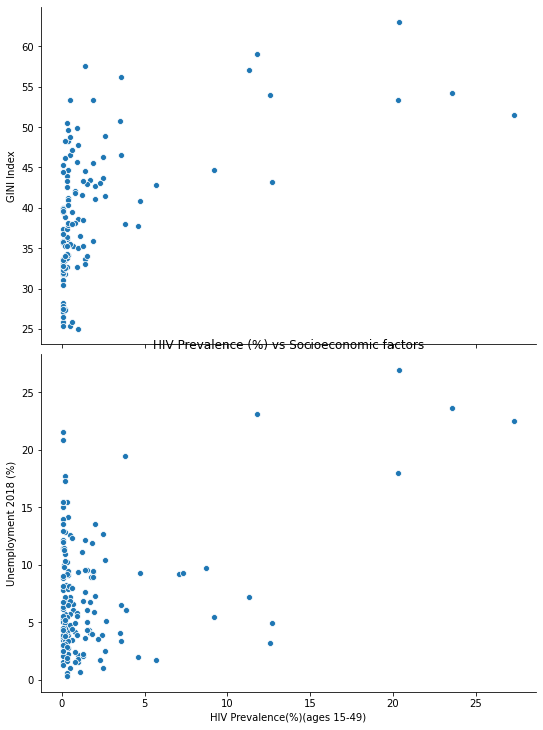

In [120]:

g = sns.pairplot(df_socio,
                  x_vars=["HIV Prevalence(%)(ages 15-49)"],
                  y_vars=["GINI Index", "Unemployment 2018 (%)"],height=5,aspect=1.5)

plt.title("HIV Prevalence (%) vs Socioeconomic factors")

Text(0.5, 1.0, 'HIV Prevalence (%) vs Socioeconomic factors')

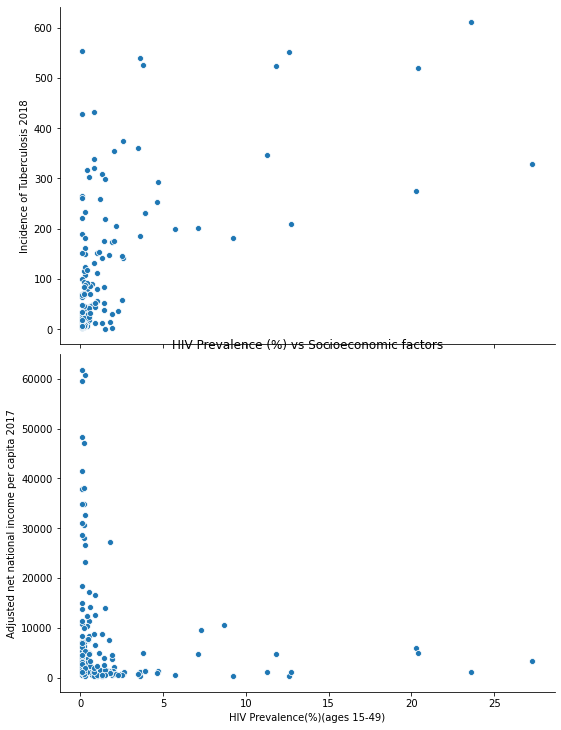

In [121]:
g = sns.pairplot(df_socio,
                  x_vars=["HIV Prevalence(%)(ages 15-49)"],
                  y_vars=["Incidence of Tuberculosis 2018",
                         "Adjusted net national income per capita 2017"],height=5,aspect=1.5)
plt.title("HIV Prevalence (%) vs Socioeconomic factors")